In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from tqdm.notebook import tqdm
from scipy.optimize import minimize
import seaborn as sns

# For simplicity, we consirer the risk free rate to be 5% annual
rf = 5/100


def readMatrixFromCSV(filename):
    matrix = []

    with open(filename, 'r') as file:
        content = file.read()

    subMatrices = content.strip().split('\n\n')
    for subMatrix in subMatrices:
        rows = subMatrix.strip().split('\n')
        matrix.append([[float(element) for element in row.split(',')] for row in rows])

    return matrix

# Example usage
filename = '/Users/ronaldleung/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Computational Finance with C++/Assignment/data/OOS_returns.csv'
OOS_return = readMatrixFromCSV(filename)
print(OOS_return)
print("number of iterations: ",len(OOS_return))
print("number of rows: ", len(OOS_return[0]))
print("number of column: ",len(OOS_return[0][0]))

[[[0.0, 0.000511301, 0.000218867], [0.005, 0.00741709, 0.000410311], [0.01, 0.0138227, 0.000816736], [0.015, 0.0212, 0.00191818], [0.02, 0.0291863, 0.00374861], [0.025, 0.0364467, 0.00515558], [0.03, 0.043779, 0.00689799], [0.035, 0.0509924, 0.00887833], [0.04, 0.0582011, 0.0111451], [0.045, 0.0654185, 0.0137026], [0.05, 0.0726516, 0.0165403], [0.055, 0.0808509, 0.0194813], [0.06, 0.0875324, 0.0227851], [0.065, 0.0952676, 0.026393], [0.07, 0.102675, 0.0302849], [0.075, 0.110589, 0.034686], [0.08, 0.118242, 0.0391554], [0.085, 0.125557, 0.0438874], [0.09, 0.132621, 0.0488809], [0.095, 0.140891, 0.0543303], [0.1, 0.148265, 0.059888]], [[0.0, 0.00617533, 0.000334899], [0.005, 0.0047545, 0.000114726], [0.01, 0.0021823, 0.000196242], [0.015, 0.000115433, 0.000744651], [0.02, -0.00123026, 0.00223645], [0.025, -0.00303109, 0.00380577], [0.03, -0.00497447, 0.00577682], [0.035, -0.00654564, 0.00828611], [0.04, -0.00807597, 0.0113399], [0.045, -0.00995226, 0.0148223], [0.05, -0.0118773, 0.018623

In [3]:

# Load the CSV data into a pandas DataFrame
returns = pd.read_csv('/Users/ronaldleung/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Computational Finance with C++/Assignment/data/asset_returns.csv', header=None)

stock_names = []
for i in range(1, 84):
    stock_names.append("Company " + str(i))
print(stock_names)

#add the stock names to the columns
returns.columns = stock_names
mean_returns = returns.mean()
cov_matrix = returns.cov()

['Company 1', 'Company 2', 'Company 3', 'Company 4', 'Company 5', 'Company 6', 'Company 7', 'Company 8', 'Company 9', 'Company 10', 'Company 11', 'Company 12', 'Company 13', 'Company 14', 'Company 15', 'Company 16', 'Company 17', 'Company 18', 'Company 19', 'Company 20', 'Company 21', 'Company 22', 'Company 23', 'Company 24', 'Company 25', 'Company 26', 'Company 27', 'Company 28', 'Company 29', 'Company 30', 'Company 31', 'Company 32', 'Company 33', 'Company 34', 'Company 35', 'Company 36', 'Company 37', 'Company 38', 'Company 39', 'Company 40', 'Company 41', 'Company 42', 'Company 43', 'Company 44', 'Company 45', 'Company 46', 'Company 47', 'Company 48', 'Company 49', 'Company 50', 'Company 51', 'Company 52', 'Company 53', 'Company 54', 'Company 55', 'Company 56', 'Company 57', 'Company 58', 'Company 59', 'Company 60', 'Company 61', 'Company 62', 'Company 63', 'Company 64', 'Company 65', 'Company 66', 'Company 67', 'Company 68', 'Company 69', 'Company 70', 'Company 71', 'Company 72', 

In [4]:
def random_weigths(nb_weights):
    weights = np.array(np.random.random(nb_weights))
    weights /= np.sum(weights) #make sure they sum to 1
    return weights

def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    #Convert to Matrices for simplicity
    C = np.asmatrix(cov_matrix)
    p = np.asmatrix(mean_returns)
    w = np.asmatrix(weights)
    
    # Note that the 252 is to annualize
    ret = w * p.T * 252
    stdev = np.sqrt(w * C * w.T) * np.sqrt(252)
    sharpe = ((ret-rf)/stdev)
    stdev = stdev **2
    
    return ret.item(), stdev.item(), sharpe.item()

In [5]:
# set number of runs of random portfolio weights
nb_random_portfolios = 20000
portfolios = {'Returns':[], 'StDev':[], 'Sharpe':[]}

for i in tqdm(range(nb_random_portfolios)):
    # Create random weights for portfolio holdings
    weights = random_weigths(len(stock_names))
    
    # Portfolio return, volatility (annual) and sharpe
    ret, stdev, sharpe = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    
    #Store the results
    portfolios['Returns'].append(ret)
    portfolios['StDev'].append(stdev)
    portfolios['Sharpe'].append(sharpe)


  0%|          | 0/20000 [00:00<?, ?it/s]

In [6]:
#Find the max Sharpe ratio (used in the plot)
max_sharpe_port = portfolios['Sharpe'].index(max(portfolios['Sharpe']))
max_sharpe_mean, max_sharpe_stdev = portfolios['Returns'][max_sharpe_port], portfolios['StDev'][max_sharpe_port]
print('Max Sharpe Ratio:', max(portfolios['Sharpe']))

Max Sharpe Ratio: 1.5987598861549148


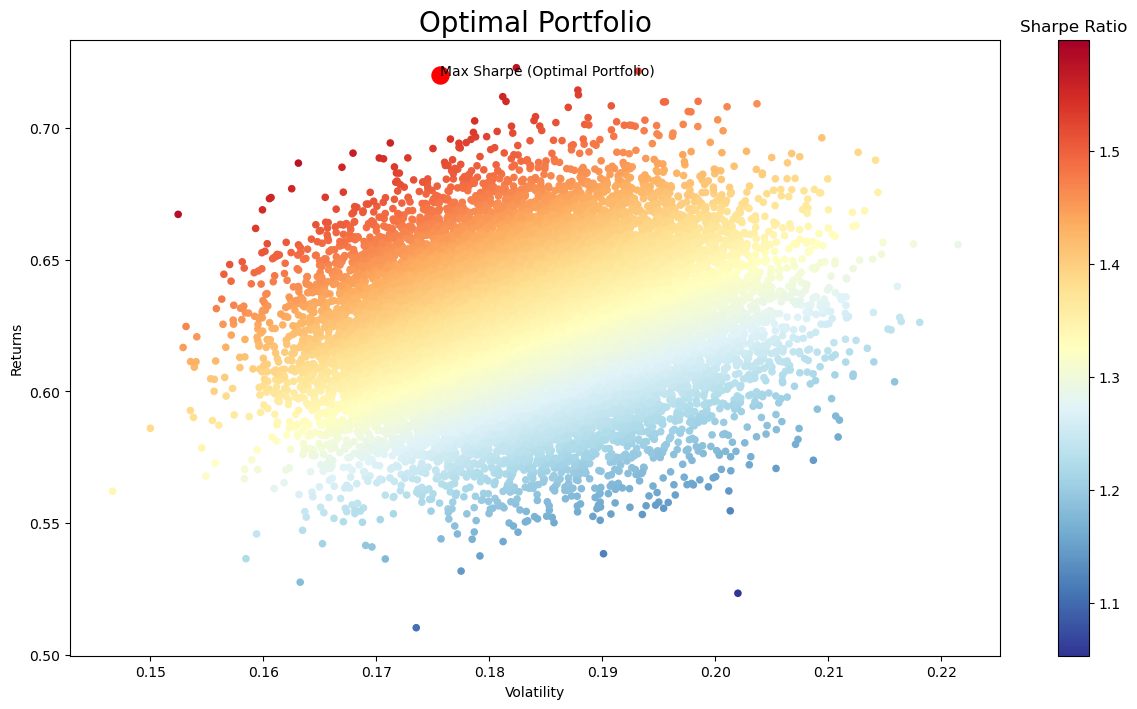

In [7]:
#Create scatter plot coloured by Sharpe Ratio
fig, ax = plt.subplots(figsize = (15,8))
h = ax.scatter(portfolios['StDev'],portfolios['Returns'],c=portfolios['Sharpe'],cmap='RdYlBu_r', s=20)
ax.set_xlabel('Volatility')
ax.set_ylabel('Returns')
clb = fig.colorbar(h)
clb.ax.set_title('Sharpe Ratio')
ax.scatter(max_sharpe_stdev,max_sharpe_mean,color='r',s=150)
ax.annotate('Max Sharpe (Optimal Portfolio)', (max_sharpe_stdev,max_sharpe_mean))

"""

#Show the location of the original stocks
for stock in stock_names:
    index = cov_matrix.index.get_loc(stock)
    ax.annotate(stock, (np.sqrt(cov_matrix[stock][index])* np.sqrt(252),mean_returns[index]* 252))
    ax.scatter(np.sqrt(cov_matrix[stock][index])* np.sqrt(252),mean_returns[index]* 252,color='g',s=100)
"""

ax.set_title('Optimal Portfolio', fontsize=20)
plt.show()

## Plot the results by optimisation

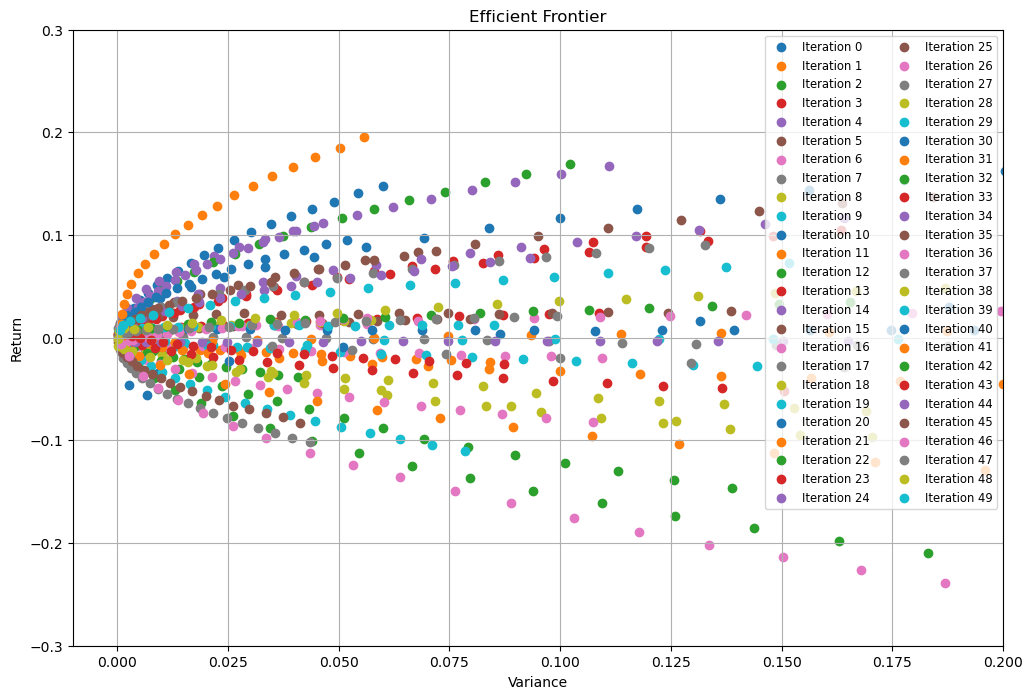

In [8]:
#Plot the effieienct frontier from OOS_return
plt.figure(figsize=(12, 8))


#use a for loop to plot the first 10  iterations
for i in range(len(OOS_return)):
    plt.scatter([row[2] for row in OOS_return[i]], [row[1] for row in OOS_return[i]], label='Iteration '+str(i))

plt.xlim(-0.01, 0.2)
plt.ylim(-0.3, 0.3)
plt.xlabel('Variance')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend(fontsize='small', ncol = 2)
plt.grid(True)
plt.show()



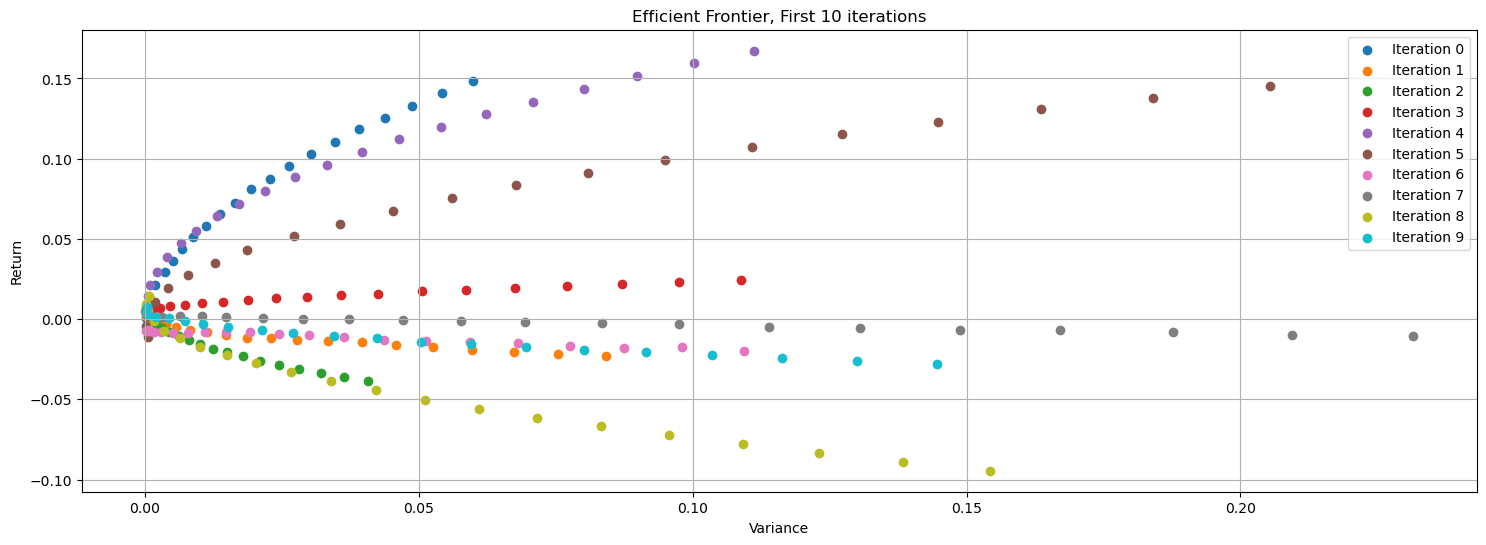

In [9]:
#Plot the effieienct frontier from OOS_return
plt.figure(figsize=(18, 6))


#use a for loop to plot the first 10  iterations
for i in range(10):
    plt.scatter([row[2] for row in OOS_return[i]], [row[1] for row in OOS_return[i]], label='Iteration '+str(i))


plt.xlabel('Variance')
plt.ylabel('Return')
plt.title('Efficient Frontier, First 10 iterations')
plt.legend()
plt.grid(True)
plt.show()


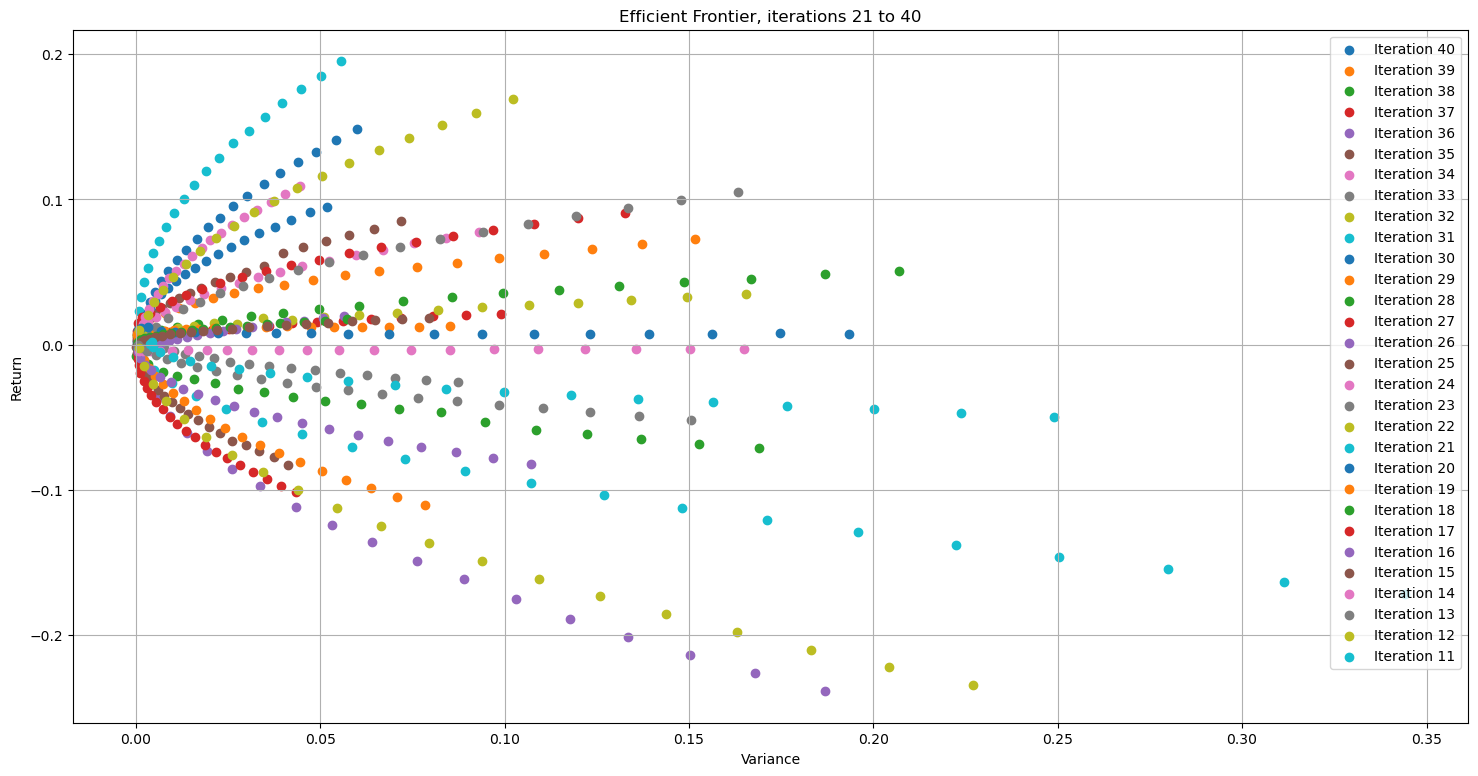

In [10]:
#Plot the effieienct frontier from OOS_return
plt.figure(figsize=(18, 9))


#use a for loop to plot the last 30  iterations
for i in range(30):
    plt.scatter([row[2] for row in OOS_return[-i]], [row[1] for row in OOS_return[-i]], label='Iteration '+str(40-i))

plt.xlabel('Variance')
plt.ylabel('Return')
plt.title('Efficient Frontier, iterations 21 to 40')
plt.legend()
plt.grid(True)
plt.show()


# Out of sample actual return compare with target return

In [12]:
OOS_return = readMatrixFromCSV(filename)
print(OOS_return)
print("number of iterations: ",len(OOS_return)) #the number of iterations
print("number of rows: ", len(OOS_return[0])) #the rows represent the number of data points
print("number of column: ",len(OOS_return[0][0])) #the first column is target return, the second column is the expected return, the third column is the variance


[[[0.0, 0.000511301, 0.000218867], [0.005, 0.00741709, 0.000410311], [0.01, 0.0138227, 0.000816736], [0.015, 0.0212, 0.00191818], [0.02, 0.0291863, 0.00374861], [0.025, 0.0364467, 0.00515558], [0.03, 0.043779, 0.00689799], [0.035, 0.0509924, 0.00887833], [0.04, 0.0582011, 0.0111451], [0.045, 0.0654185, 0.0137026], [0.05, 0.0726516, 0.0165403], [0.055, 0.0808509, 0.0194813], [0.06, 0.0875324, 0.0227851], [0.065, 0.0952676, 0.026393], [0.07, 0.102675, 0.0302849], [0.075, 0.110589, 0.034686], [0.08, 0.118242, 0.0391554], [0.085, 0.125557, 0.0438874], [0.09, 0.132621, 0.0488809], [0.095, 0.140891, 0.0543303], [0.1, 0.148265, 0.059888]], [[0.0, 0.00617533, 0.000334899], [0.005, 0.0047545, 0.000114726], [0.01, 0.0021823, 0.000196242], [0.015, 0.000115433, 0.000744651], [0.02, -0.00123026, 0.00223645], [0.025, -0.00303109, 0.00380577], [0.03, -0.00497447, 0.00577682], [0.035, -0.00654564, 0.00828611], [0.04, -0.00807597, 0.0113399], [0.045, -0.00995226, 0.0148223], [0.05, -0.0118773, 0.018623

In [17]:
#plot the rolling window for OOS_return to compare actual returns vs target returns
plt.figure(figsize=(18, 9))

plot_data = []

for i in range(len(OOS_return)):
    for j in range(len(OOS_return[i])):
        return_diff = OOS_return[i][j][1] - OOS_return[i][j][0] #actual return - target return
        iteration = i
        target_return = OOS_return[i][j][0]
        #store the results 
        plot_data.append([iteration, target_return, return_diff])


print(plot_data)

        


[[0, 0.0, 0.000511301], [0, 0.005, 0.00241709], [0, 0.01, 0.0038227], [0, 0.015, 0.006200000000000001], [0, 0.02, 0.009186299999999998], [0, 0.025, 0.011446699999999997], [0, 0.03, 0.013779], [0, 0.035, 0.015992399999999997], [0, 0.04, 0.018201099999999998], [0, 0.045, 0.020418500000000006], [0, 0.05, 0.022651599999999994], [0, 0.055, 0.025850900000000003], [0, 0.06, 0.0275324], [0, 0.065, 0.03026759999999999], [0, 0.07, 0.032674999999999996], [0, 0.075, 0.03558900000000001], [0, 0.08, 0.038242], [0, 0.085, 0.040556999999999996], [0, 0.09, 0.04262099999999999], [0, 0.095, 0.04589099999999999], [0, 0.1, 0.048265], [1, 0.0, 0.00617533], [1, 0.005, -0.00024550000000000006], [1, 0.01, -0.0078177], [1, 0.015, -0.014884567], [1, 0.02, -0.02123026], [1, 0.025, -0.02803109], [1, 0.03, -0.03497447], [1, 0.035, -0.04154564], [1, 0.04, -0.04807597], [1, 0.045, -0.054952259999999996], [1, 0.05, -0.0618773], [1, 0.055, -0.0666261], [1, 0.06, -0.0733148], [1, 0.065, -0.0786844], [1, 0.07, -0.0844464

<Figure size 1800x900 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

# Assuming plot_data is a list of lists or a numpy array
iterations = [row[0] for row in plot_data]
difference = [row[2] for row in plot_data]

# Plotting the difference
plt.plot(iterations, difference)
plt.xlabel('Iterations')
plt.ylabel('Difference (Target Return - Actual Return)')
plt.title('Difference in Target Return across Iterations')
plt.show()

TypeError: list indices must be integers or slices, not tuple

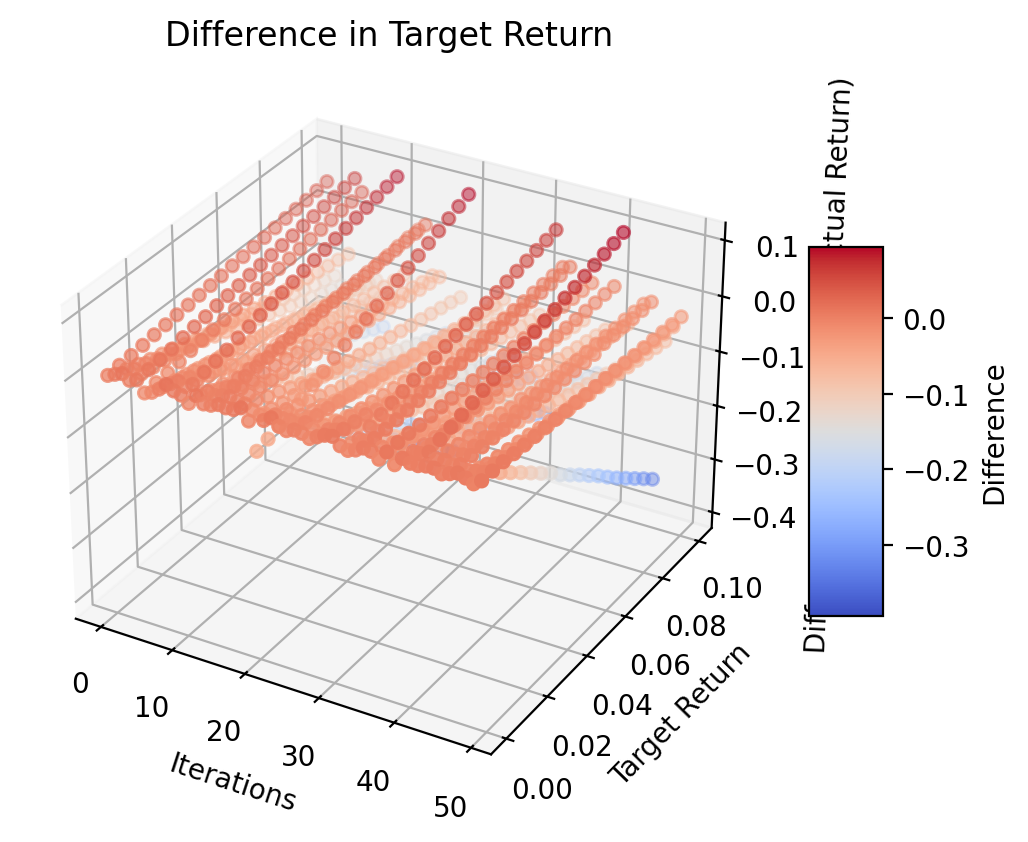

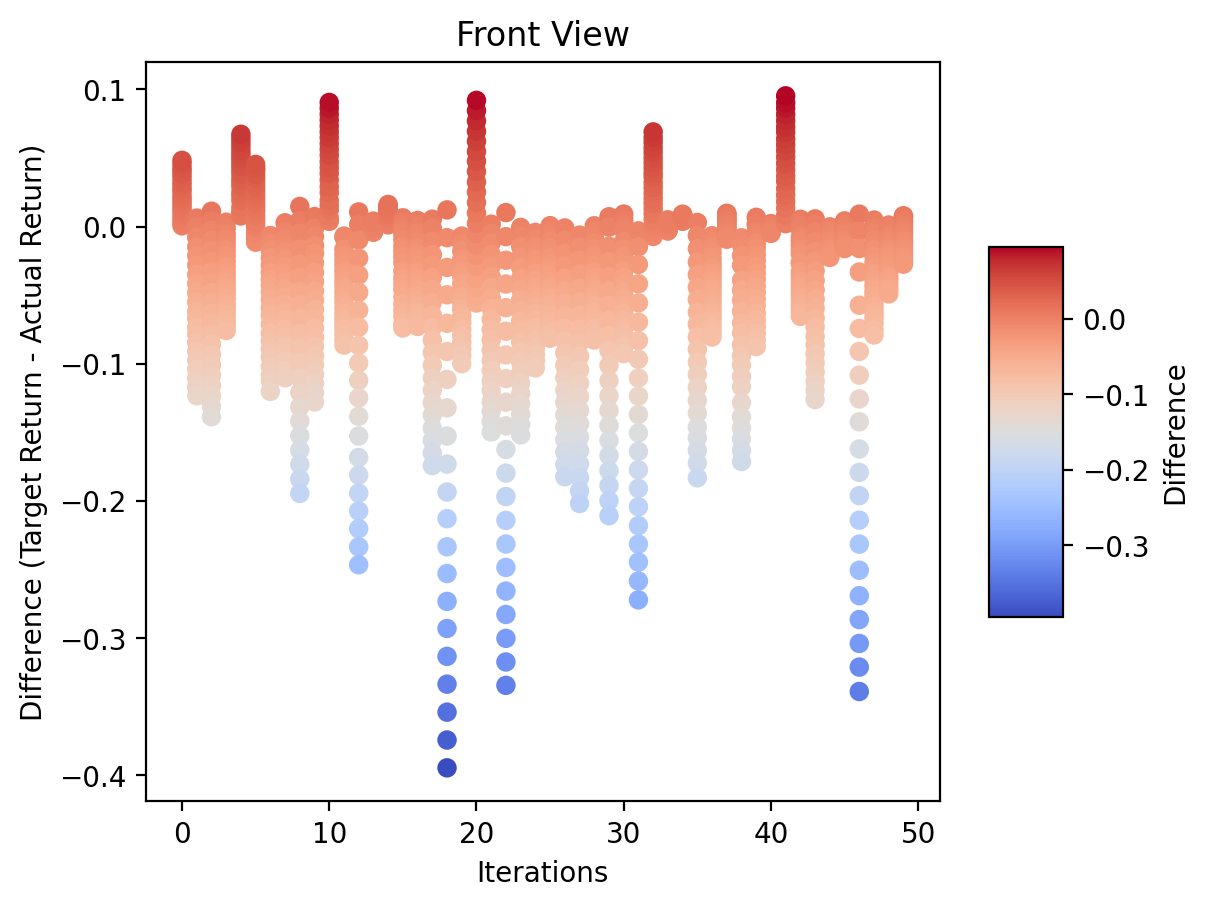

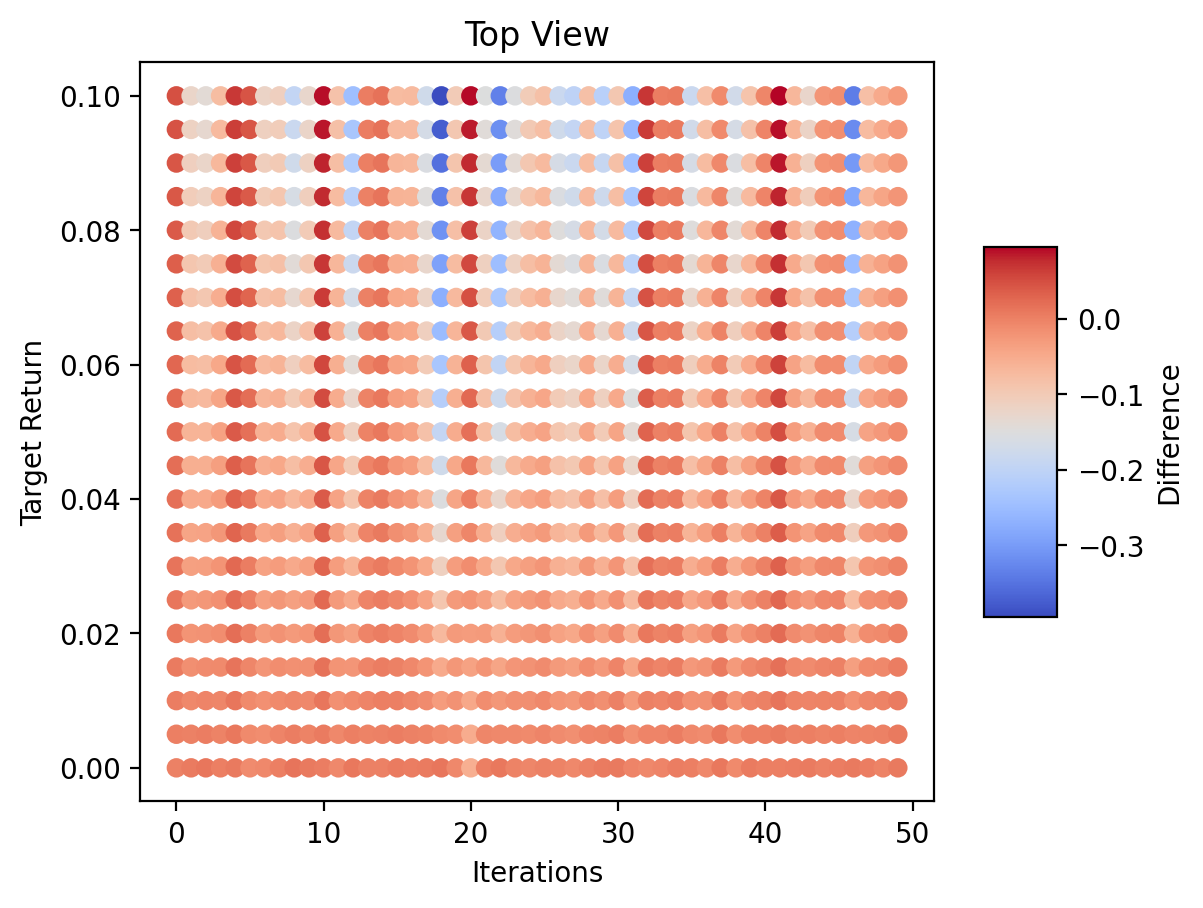

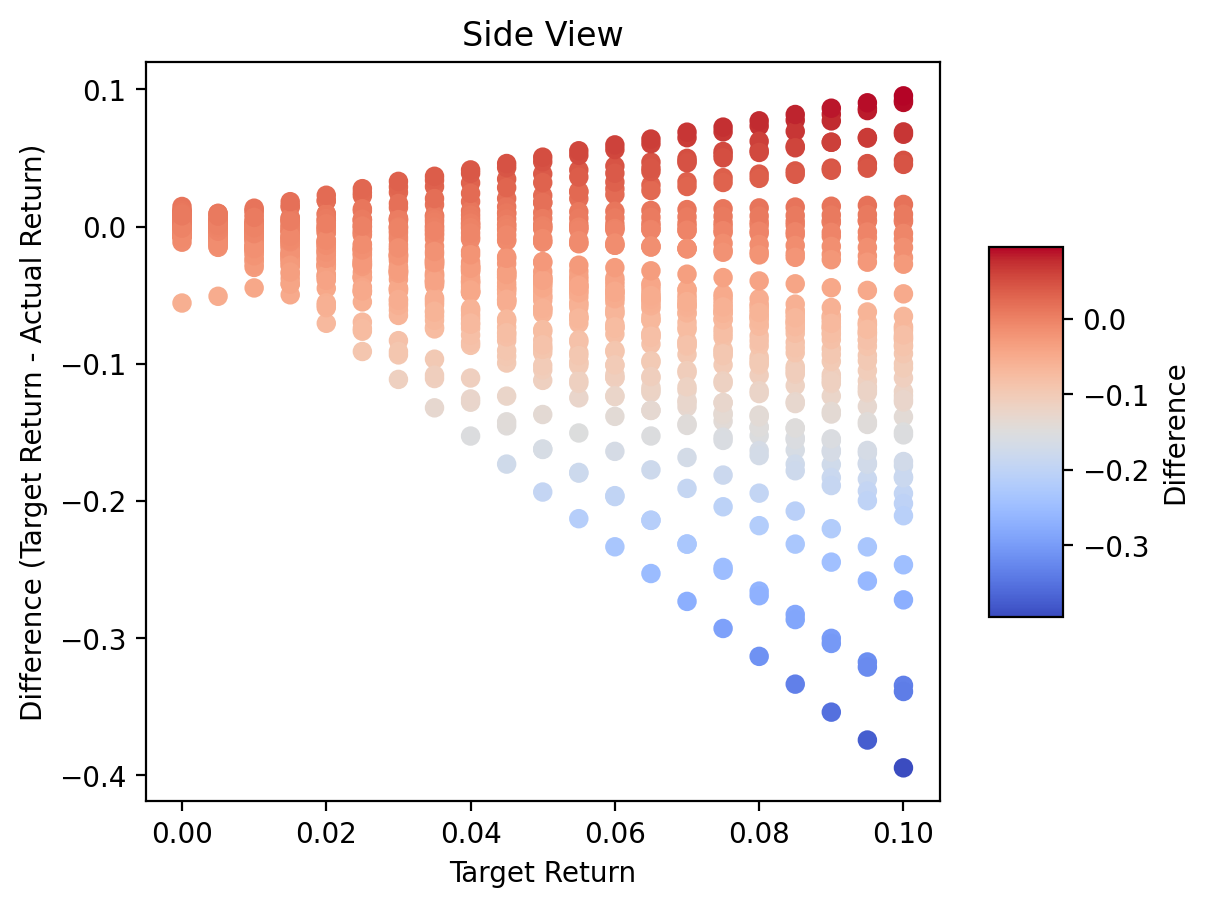

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# Extract data
iterations = [row[0] for row in plot_data]
target_return = [row[1] for row in plot_data]
difference = [row[2] for row in plot_data]

# Create a new figure for the 3D plot
fig = plt.figure( dpi = 200)

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
sc = ax.scatter(iterations, target_return, difference, c=difference, cmap='coolwarm')

# Add colorbar
fig.colorbar(sc, ax=ax, shrink=0.5, aspect=5, label='Difference')

# Set labels and title
ax.set_xlabel('Iterations')
ax.set_ylabel('Target Return')
ax.set_zlabel('Difference (Target Return - Actual Return)')
ax.set_title('Difference in Target Return')

# Show the plot
plt.show()

# Create a new figure for the front view
fig, ax = plt.subplots(dpi = 200)

# Create a 2D scatter plot for the front view (iterations vs difference)
sc = ax.scatter(iterations, difference, c=difference, cmap='coolwarm')

# Add colorbar
fig.colorbar(sc, ax=ax, shrink=0.5, aspect=5, label='Difference')

# Set labels and title
ax.set_xlabel('Iterations')
ax.set_ylabel('Difference (Target Return - Actual Return)')
ax.set_title('Front View')

# Show the plot
plt.show()

# Create a new figure for the top view
fig, ax = plt.subplots(dpi = 200)

# Create a 2D scatter plot for the top view (iterations vs target return)
sc = ax.scatter(iterations, target_return, c=difference, cmap='coolwarm')

# Add colorbar
fig.colorbar(sc, ax=ax, shrink=0.5, aspect=5, label='Difference')

# Set labels and title
ax.set_xlabel('Iterations')
ax.set_ylabel('Target Return')
ax.set_title('Top View')

# Show the plot
plt.show()

# Create a new figure for the side view
fig, ax = plt.subplots(dpi = 200)

# Create a 2D scatter plot for the side view (target return vs difference)
sc = ax.scatter(target_return, difference, c=difference, cmap='coolwarm')

# Add colorbar
fig.colorbar(sc, ax=ax, shrink=0.5, aspect=5, label='Difference')

# Set labels and title
ax.set_xlabel('Target Return')
ax.set_ylabel('Difference (Target Return - Actual Return)')
ax.set_title('Side View')

# Show the plot
plt.show()

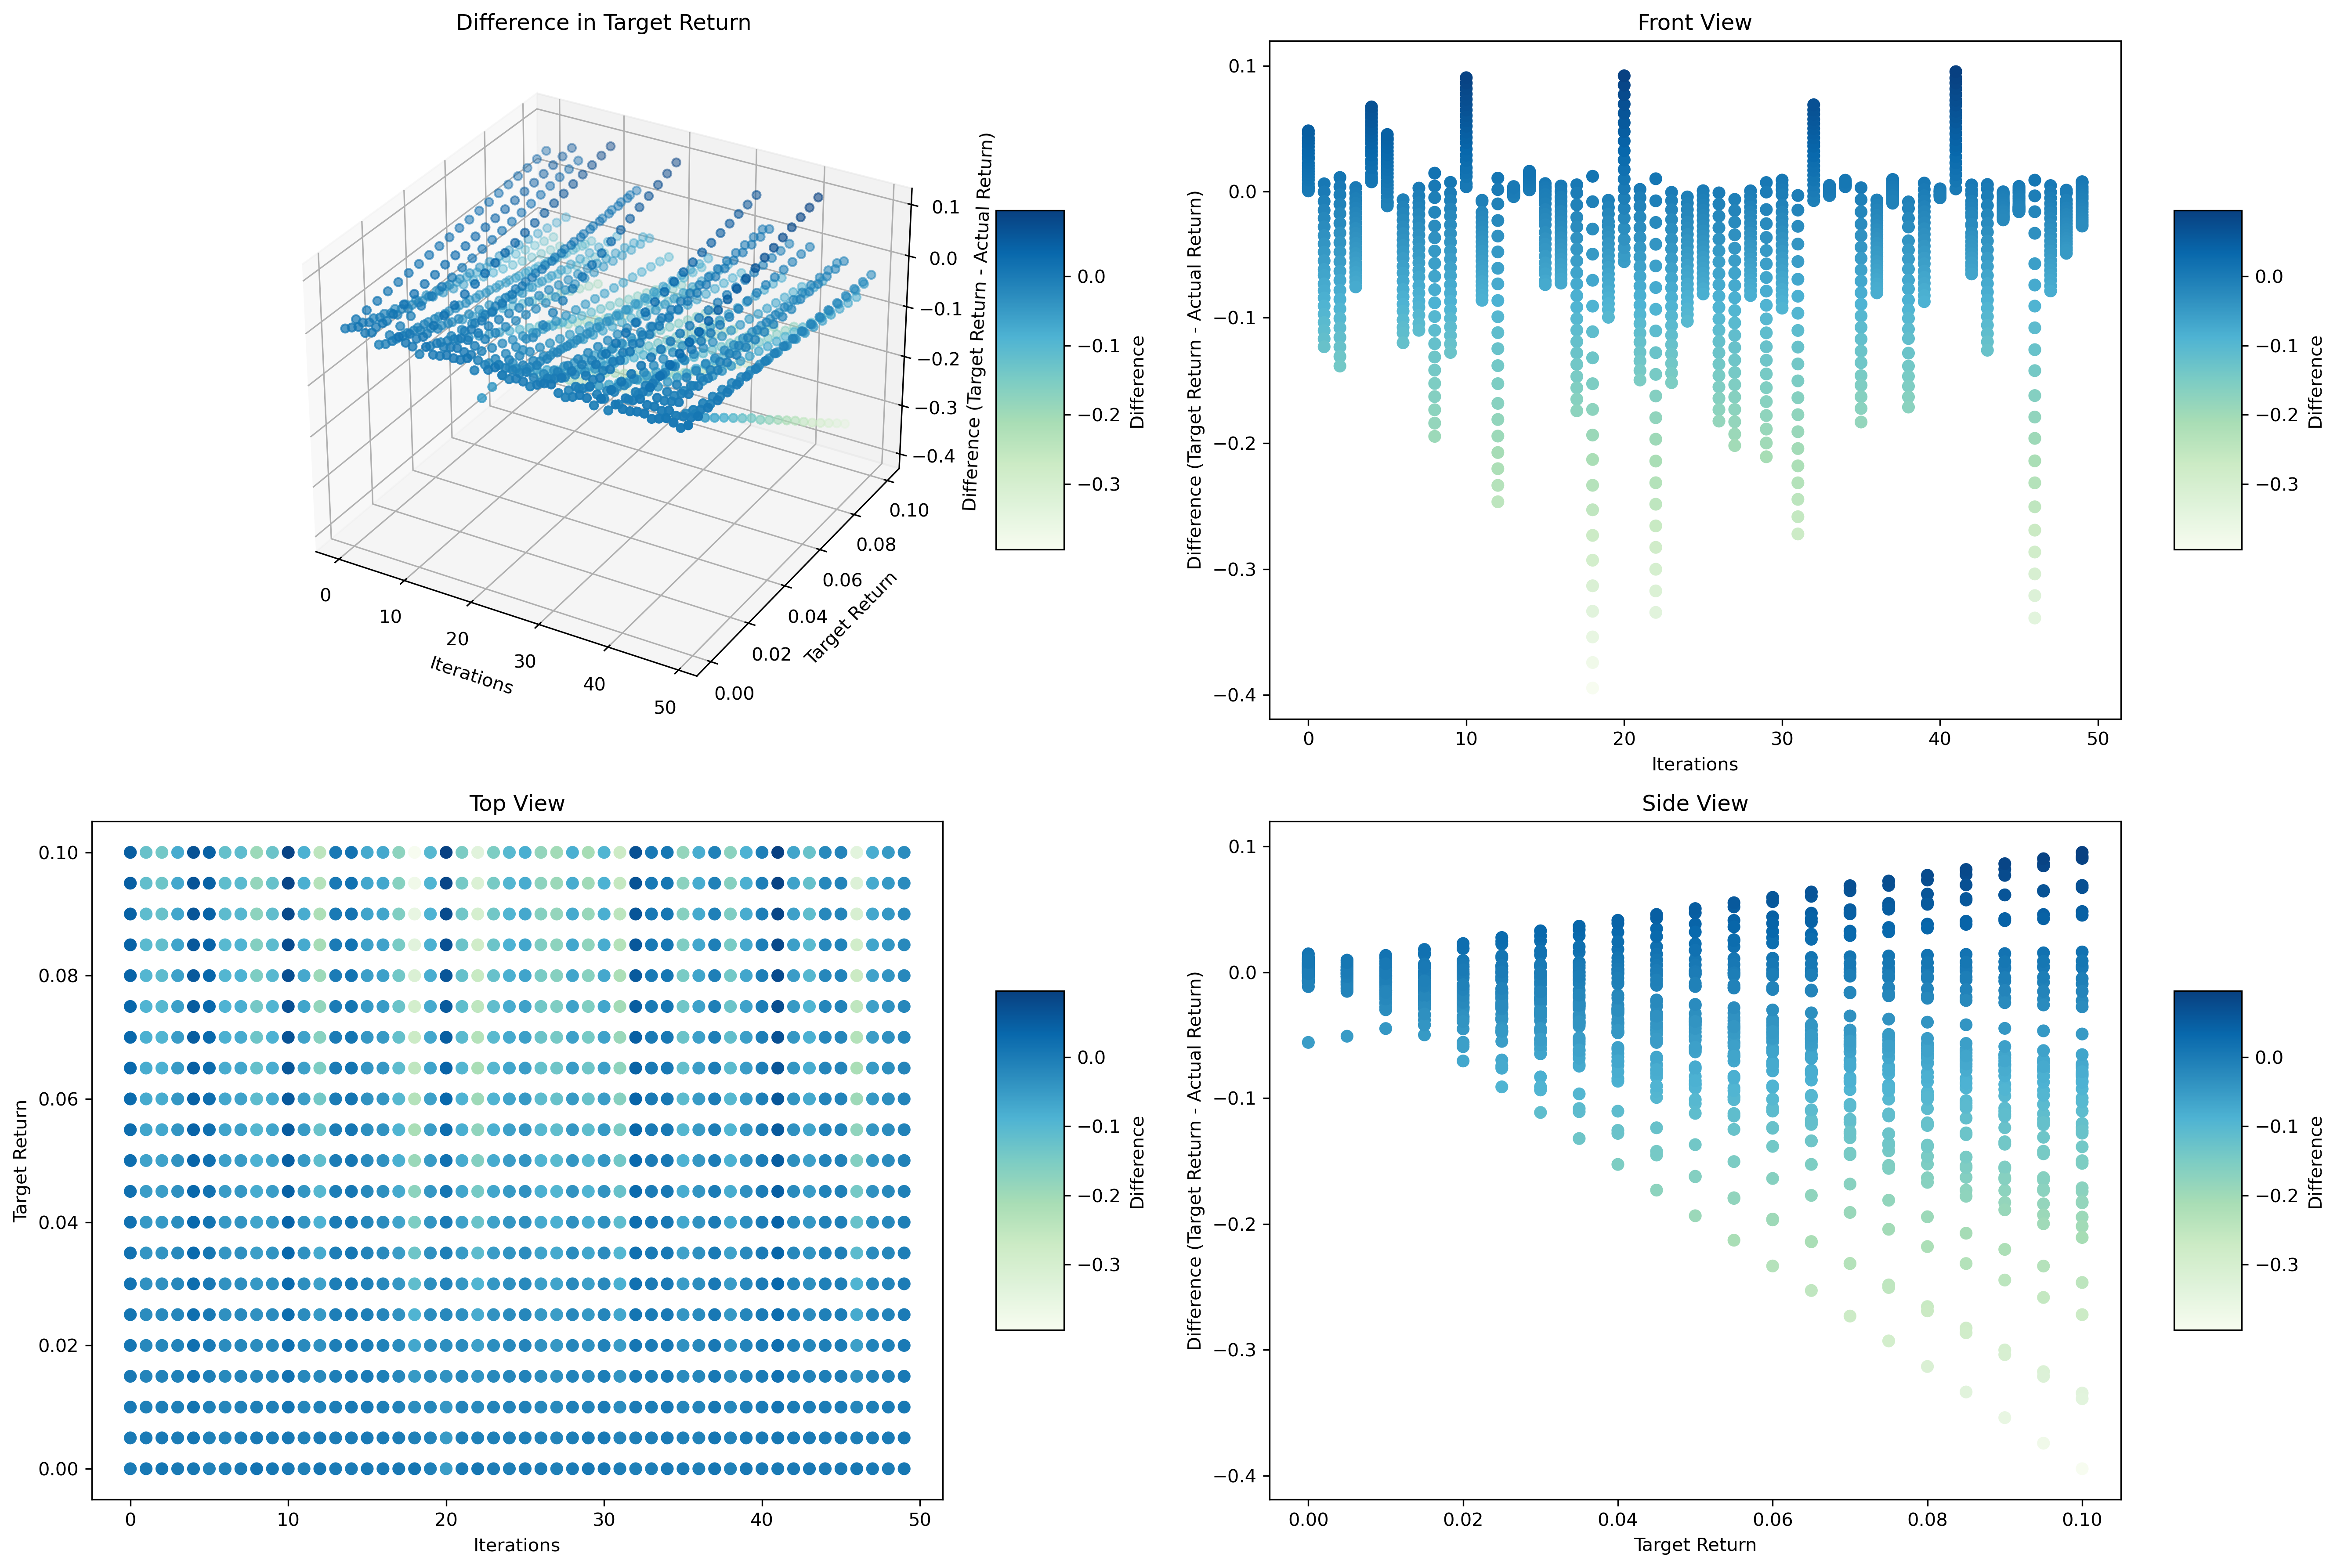

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# Extract data
iterations = [row[0] for row in plot_data]
target_return = [row[1] for row in plot_data]
difference = [row[2] for row in plot_data]

# Create a new figure for the 3D plot
fig = plt.figure(figsize=(18, 12), dpi = 300)

# Add a 3D subplot
ax1 = fig.add_subplot(221, projection='3d')

# Create a 3D scatter plot
sc = ax1.scatter(iterations, target_return, difference, c=difference, cmap='GnBu')

# Add colorbar
fig.colorbar(sc, ax=ax1, shrink=0.5, aspect=5, label='Difference')

# Set labels and title
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Target Return')
ax1.set_zlabel('Difference (Target Return - Actual Return)')
ax1.set_title('Difference in Target Return')

# Create a 2D subplot for the front view (iterations vs difference)
ax2 = fig.add_subplot(222)

# Create a 2D scatter plot for the front view
sc = ax2.scatter(iterations, difference, c=difference, cmap='GnBu')

# Add colorbar
fig.colorbar(sc, ax=ax2, shrink=0.5, aspect=5, label='Difference')

# Set labels and title
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Difference (Target Return - Actual Return)')
ax2.set_title('Front View')

# Create a 2D subplot for the top view (iterations vs target return)
ax3 = fig.add_subplot(223)

# Create a 2D scatter plot for the top view
sc = ax3.scatter(iterations, target_return, c=difference, cmap='GnBu')

# Add colorbar
fig.colorbar(sc, ax=ax3, shrink=0.5, aspect=5, label='Difference')

# Set labels and title
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Target Return')
ax3.set_title('Top View')

# Create a 2D subplot for the side view (target return vs difference)
ax4 = fig.add_subplot(224)

# Create a 2D scatter plot for the side view
sc = ax4.scatter(target_return, difference, c=difference, cmap='GnBu')

# Add colorbar
fig.colorbar(sc, ax=ax4, shrink=0.5, aspect=5, label='Difference')

# Set labels and title
ax4.set_xlabel('Target Return')
ax4.set_ylabel('Difference (Target Return - Actual Return)')
ax4.set_title('Side View')

# Show the plot
plt.tight_layout()
plt.show()

In [39]:
import plotly.graph_objects as go

# Extract data
iterations = [row[0] for row in plot_data]
target_return = [row[1] for row in plot_data]
difference = [row[2] for row in plot_data]

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=iterations,
    y=target_return,
    z=difference,
    mode='markers',
    marker=dict(
        size=6,
        color=difference,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# Set labels and title
fig.update_layout(scene = dict(
                    xaxis_title='Iterations',
                    yaxis_title='Target Return',
                    zaxis_title='Difference (Target Return - Actual Return)'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()